In [1]:
import pandas as pd
df=pd.read_csv("/content/traffic_congestion.csv")

In [16]:
%%capture
!pip install catboost

In [3]:
df.head()

,sensor_count,avg_speed,time_of_day,congestion_level
0,4,21.723781,morning,medium
1,17,17.319749,morning,low
2,3,54.550117,night,high
3,13,59.453301,night,high
4,9,12.211030,evening,medium


In [5]:
#checking is the dataset contains any null value
df.isnull().sum()

,0
sensor_count,0
avg_speed,0
time_of_day,0
congestion_level,0


In [6]:
df.select_dtypes(include=['object']).columns

Index(['time_of_day', 'congestion_level'], dtype='object')

In [20]:
df.select_dtypes(include=['int']).columns

Index(['sensor_count'], dtype='object')

In [32]:
#catboost features
df_cat_features=df[["sensor_count","time_of_day","avg_speed"]]

In [33]:
df_cat_features

,sensor_count,time_of_day,avg_speed
0,4,morning,21
1,17,morning,17
2,3,night,54
3,13,night,59
4,9,evening,12
...,...,...,...
95,14,afternoon,15
96,18,morning,21
97,15,evening,46
98,2,afternoon,33


In [40]:
#converting float64 to int as catboost accepts only string and int.
df["avg_speed"]=df["avg_speed"].astype('int')

In [43]:
#spliting dataset into test and train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_cat_features, df["congestion_level"], test_size=0.2, random_state=42)

In [41]:
#catboost features
cat_features = ["sensor_count", "time_of_day", "avg_speed"]

In [47]:
#model training
from catboost import CatBoostClassifier, Pool
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
train_pool.set_feature_names(X_train.columns.tolist())
model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='MultiClass')
model.fit(train_pool, verbose=False)
predictions = model.predict(X_train)

In [49]:
print(predictions)

[['high']
 ['high']
 ['high']
 ['high']
 ['high']
 ['low']
 ['medium']
 ['medium']
 ['medium']
 ['low']
 ['high']
 ['high']
 ['low']
 ['high']
 ['medium']
 ['high']
 ['medium']
 ['medium']
 ['low']
 ['high']
 ['medium']
 ['low']
 ['medium']
 ['low']
 ['low']
 ['medium']
 ['high']
 ['medium']
 ['low']
 ['low']
 ['medium']
 ['high']
 ['high']
 ['high']
 ['medium']
 ['high']
 ['medium']
 ['low']
 ['low']
 ['medium']
 ['medium']
 ['medium']
 ['high']
 ['high']
 ['medium']
 ['high']
 ['medium']
 ['low']
 ['low']
 ['low']
 ['medium']
 ['medium']
 ['low']
 ['low']
 ['high']
 ['high']
 ['high']
 ['low']
 ['high']
 ['low']
 ['medium']
 ['medium']
 ['medium']
 ['low']
 ['low']
 ['low']
 ['medium']
 ['medium']
 ['low']
 ['high']
 ['high']
 ['low']
 ['high']
 ['high']
 ['medium']
 ['low']
 ['low']
 ['medium']
 ['medium']
 ['high']]


In [52]:
#catboost do not provide overall precision,f1 and recall.
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
print("Macro Precision:", precision_score(y_test, y_pred, average='macro'))
print("Macro Recall:   ", recall_score(   y_test, y_pred, average='macro'))
print("Macro F1:       ", f1_score(       y_test, y_pred, average='macro'))


Macro Precision: 0.4666666666666666
Macro Recall:    0.4219576719576719
Macro F1:        0.42483660130718953


In [50]:
from datetime import time
def predict_traffic(sensor_count, time_of_day, avg_speed):
    input_data = pd.DataFrame([[sensor_count, time_of_day, avg_speed]], columns=["sensor_count", "time_of_day", "avg_speed"])
    predictions=model.predict(input_data)
    return predictions
sensor_count=int(input())
time_of_day=input()
avg_speed=int(input())
predictions=predict_traffic(sensor_count,time_of_day,avg_speed)
print(predictions)

4
morning
21
[['medium']]


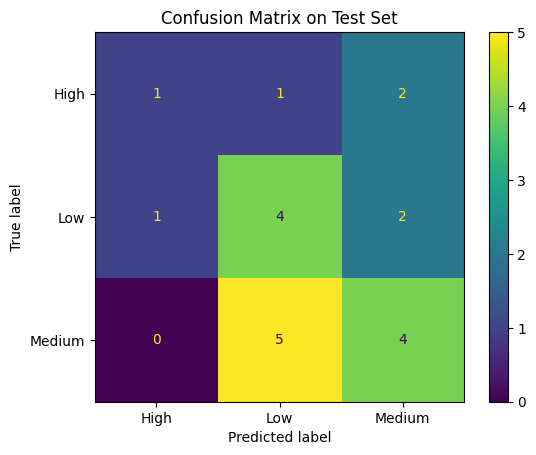

In [55]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["High", "Low", "Medium"]
)
cm_display.plot()
plt.title("Confusion Matrix ")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from catboost import CatBoostClassifier, Pool
from datetime import time
# 1. Load the data
df = pd.read_csv("/content/traffic_congestion.csv")
# 2. EDA
df.head()
df.isnull().sum()
df.select_dtypes(include=['object']).columns
df.select_dtypes(include=['int']).columns

# 3. Feature preparation
df["avg_speed"] = df["avg_speed"].astype(int)
X = df[["sensor_count", "time_of_day", "avg_speed"]]
y = df["congestion_level"]

# 4. Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Prepare CatBoost Pool
cat_features = ["sensor_count", "time_of_day", "avg_speed"]
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
train_pool.set_feature_names(X_train.columns.tolist())

# 6. Train the model
model = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    loss_function='MultiClass'
)
model.fit(train_pool, verbose=False)

# 7. Evaluate on training set (optional check)
train_preds = model.predict(X_train)

# 8. Final evaluation on test set
y_pred = model.predict(X_test)
print("Macro Precision:", precision_score(y_test, y_pred, average='macro'))
print("Macro Recall:   ", recall_score(   y_test, y_pred, average='macro'))
print("Macro F1:       ", f1_score(       y_test, y_pred, average='macro'))

# 9. Prediction helper function
def predict_traffic(sensor_count, time_of_day, avg_speed):
    input_df = pd.DataFrame(
        [[sensor_count, time_of_day, avg_speed]],
        columns=["sensor_count", "time_of_day", "avg_speed"]
    )
    return model.predict(input_df)

# Example interactive prediction
sensor_count = int(input("Sensor count: "))
time_of_day   = input("Time of day: ")
avg_speed     = int(input("Average speed: "))
print("Predicted congestion level:", predict_traffic(sensor_count, time_of_day, avg_speed))

# 10. Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["High", "Low", "Medium"]
)
cm_display.plot()
plt.title("Confusion Matrix")
plt.show()
